Epoch 1/10
235/235 [==============================] - 6s 17ms/step - loss: 0.2756 - val_loss: 0.1897
Epoch 2/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1717 - val_loss: 0.1548
Epoch 3/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1452 - val_loss: 0.1345
Epoch 4/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1285 - val_loss: 0.1213
Epoch 5/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1176 - val_loss: 0.1123
Epoch 6/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1103 - val_loss: 0.1064
Epoch 7/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1052 - val_loss: 0.1021
Epoch 8/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1015 - val_loss: 0.0990
Epoch 9/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0989 - val_loss: 0.0967
Epoch 10/10
313/313 [==============================] - 1s 4ms/step


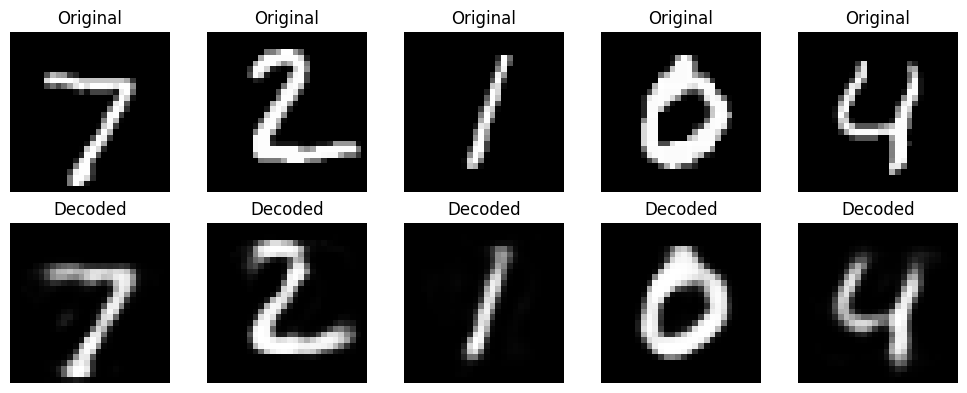

In [1]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the data
(train_images, _), (test_images, _) = mnist.load_data()

# Normalize the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images for the autoencoder
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Define the input shape (784 features for flattened 28x28 images)
input_shape = (784,)

# Define the encoding dimension (compression factor)
encoding_dim = 32  # This is a hyperparameter, you can adjust it based on your needs

# Define the encoder
input_img = Input(shape=input_shape)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=10, batch_size=256, shuffle=True, validation_data=(test_images, test_images))

# Visualize some results
decoded_images = autoencoder.predict(test_images)

# Display original and decoded images
def display_images(original, decoded, n=5):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Original Images
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Decoded Images
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded[i].reshape(28, 28), cmap='gray')
        plt.title("Decoded")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(test_images, decoded_images)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scale it between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the architecture of the autoencoder
input_layer = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Extract the encoder part of the model
encoder = Model(input_layer, encoded)

# Define a classifier on top of the encoder
classifier_input = Input(shape=(128,))
classifier_output = Dense(10, activation='softmax')(classifier_input)

classifier = Model(classifier_input, classifier_output)

# Compile the classifier
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier on the encoded features
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)

classifier.fit(encoded_train, y_train, epochs=10, batch_size=256, shuffle=True, validation_data=(encoded_test, y_test))


Epoch 1/10
235/235 [==============================] - 7s 21ms/step - loss: 0.2133 - val_loss: 0.1344
Epoch 2/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1172 - val_loss: 0.1035
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0961 - val_loss: 0.0886
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0856 - val_loss: 0.0814
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0797 - val_loss: 0.0769
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0760 - val_loss: 0.0739
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0736 - val_loss: 0.0722
Epoch 8/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0720 - val_loss: 0.0709
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0709 - val_loss: 0.0700
Epoch 10/10
313/313 [==============================] - 0s 1ms/step
Epoch 1/10
235/235 [====